<a href="https://colab.research.google.com/github/shreyasskrishna/Diagnosis_of_Diabetic_Retinopathy/blob/testing/Copy_of_S7_PROJECT_DR_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Required installations
!pip install tensorflow scikit-learn matplotlib seaborn gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.4/321.4 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 6.7 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn import svm
from sklearn.preprocessing import StandardScaler
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Load your dataset from Google Drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# Path to your dataset folder
main_folder_path = '/content/drive/MyDrive/Dataset2'
IMG_SIZE = (128, 128)
BATCH_SIZE = 32

In [ ]:
# Data Augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    horizontal_flip=True,
    rotation_range=20,
    zoom_range=0.2,
)

In [ ]:
# Train and Validation Generators
train_data_gen = datagen.flow_from_directory(
    main_folder_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)
val_data_gen = datagen.flow_from_directory(
    main_folder_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 238 images belonging to 5 classes.
Found 57 images belonging to 5 classes.


In [ ]:
# Create CNN model
from tensorflow.keras import layers, models

def create_cnn(input_shape=(128, 128, 3), num_classes=5):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# Train CNN model
cnn_model = create_cnn()
history = cnn_model.fit(train_data_gen, validation_data=val_data_gen, epochs=10)
cnn_model.save('cnn_model.h5')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 134s 5s/step - accuracy: 0.1757 - loss: 1.7780 - val_accuracy: 0.2456 - val_loss: 1.5890
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.2387 - loss: 1.5961 - val_accuracy: 0.2632 - val_loss: 1.5860
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step - accuracy: 0.2677 - loss: 1.5732 - val_accuracy: 0.2632 - val_loss: 1.5793
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 204ms/step - accuracy: 0.2617 - loss: 1.5671 - val_accuracy: 0.2632 - val_loss: 1.5854
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.3388 - loss: 1.5846 - val_accuracy: 0.2982 - val_loss: 1.5921
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - accuracy: 0.3159 - loss: 1.5795 - val_accuracy: 0.3158 - val_loss: 1.5280
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - accuracy: 0.3052 - loss: 1.5263 - val_accuracy: 0.2456 - val_loss: 1.4935
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - accuracy: 0.2932 - loss: 1.4611 - val_accuracy: 0.3509 - val_loss: 1.4464
Epoch 9/

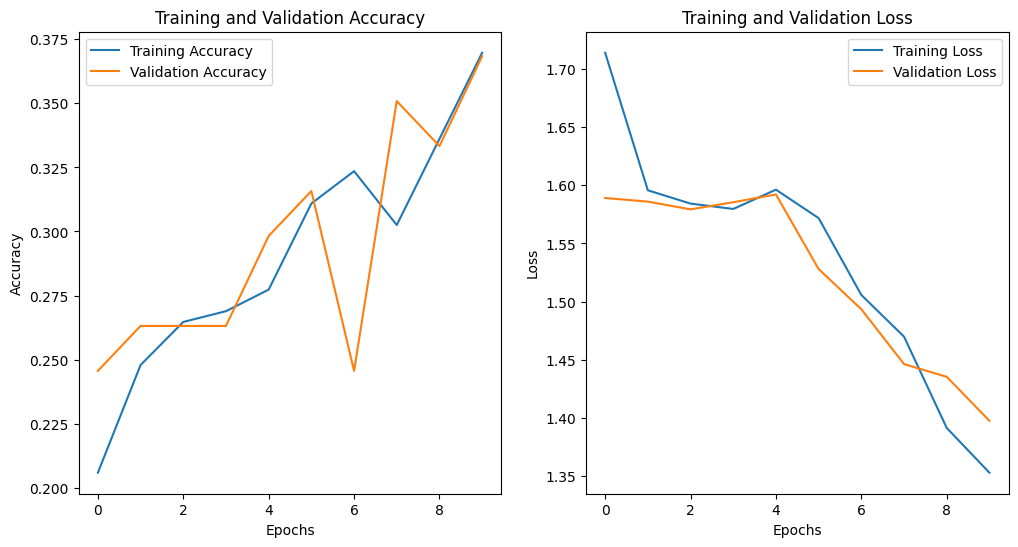

In [ ]:
# Plot training & validation accuracy/loss
def plot_training_history(history):
    # Plot accuracy
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

      # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_training_history(history)

In [ ]:
# Extract features for SVM training
X_train_features = []
y_train_labels = []

for images, labels in train_data_gen:
    features = cnn_model.predict(images)
    X_train_features.extend(features)
    y_train_labels.extend(labels)
    if len(X_train_features) >= train_data_gen.samples:
        break

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 703ms/step


In [ ]:
# Train SVM
svm_model = svm.SVC(kernel='linear', probability=True)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_features)
svm_model.fit(X_train_scaled, np.argmax(y_train_labels, axis=1))

# Save SVM and scaler
joblib.dump(svm_model, 'svm_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

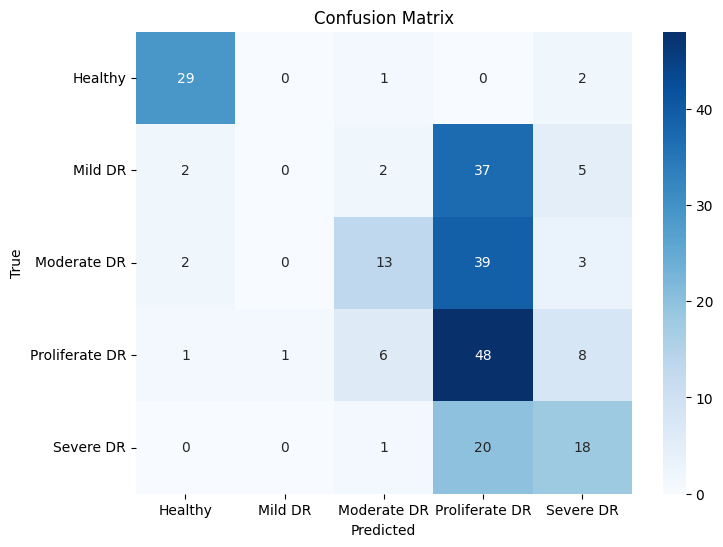

In [ ]:
# Confusion Matrix and Classification Report
y_true = np.argmax(y_train_labels, axis=1)
y_pred = svm_model.predict(X_train_scaled)

cm = confusion_matrix(y_true, y_pred)
cr = classification_report(y_true, y_pred, target_names=train_data_gen.class_indices)

# Plot confusion matrix
def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

plot_confusion_matrix(cm, list(train_data_gen.class_indices.keys()))

In [ ]:
# Show classification report
print("Classification Report:\n", cr)

Classification Report:
                 precision    recall  f1-score   support

       Healthy       0.85      0.91      0.88        32
       Mild DR       0.00      0.00      0.00        46
   Moderate DR       0.57      0.23      0.33        57
Proliferate DR       0.33      0.75      0.46        64
     Severe DR       0.50      0.46      0.48        39

      accuracy                           0.45       238
     macro avg       0.45      0.47      0.43       238
  weighted avg       0.42      0.45      0.40       238



**GRADIO**

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, ImageDataGenerator
import joblib
from PIL import Image
import matplotlib.pyplot as plt

# Load models
cnn_model = tf.keras.models.load_model('cnn_model.h5')
svm_model = joblib.load('svm_model.pkl')
scaler = joblib.load('scaler.pkl')

# Preprocessing image function
def preprocess_image(image_path, target_size=(128, 128)):
    image = Image.open(image_path)
    image = image.convert('RGB')  # Ensure image is in RGB format
    image = image.resize(target_size)
    image_array = img_to_array(image)  # Convert image to numpy array
    image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension
    image_array = image_array / 255.0  # Rescale pixel values
    return image_array

# Prediction function
def predict_image(image_path):
    # Preprocess the image
    processed_image = preprocess_image(image_path)

    # Get prediction from CNN model
    cnn_pred = cnn_model.predict(processed_image)[0]
    cnn_class = np.argmax(cnn_pred)

    # Extract features for SVM using the CNN model (before the final classification layer)
    feature_extractor = tf.keras.Model(inputs=cnn_model.inputs, outputs=cnn_model.layers[-2].output) # Assuming the last layer is the classification layer
    features = feature_extractor.predict(processed_image)

    # Scale the extracted features using the pre-trained scaler
    image_scaled = scaler.transform(features)

    svm_pred = svm_model.predict_proba(image_scaled)[0]
    svm_class = np.argmax(svm_pred)

    # Combine predictions (majority voting)
    combined_pred = cnn_pred + svm_pred
    final_class = np.argmax(combined_pred)

    # Mapping class index to label
    classes = ['Healthy', 'Mild DR', 'Moderate DR', 'Proliferate DR', 'Severe DR']
    predicted_class = classes[final_class]

    # Display prediction
    print(f"Prediction: {predicted_class}")
    print(f"CNN Prediction: {cnn_class}")
    print(f"SVM Prediction: {svm_class}")

    # Optionally: Visualize the image and CNN feature maps
    visualize_image(image_path, cnn_pred)

    return predicted_class

# Function to visualize the image and CNN feature maps
def visualize_image(image_path, cnn_pred):
    image = Image.open(image_path)
    plt.imshow(image)
    plt.title(f"Predicted Class: {cnn_pred}")
    plt.axis('off')
    plt.show()

# Provided image path
image_path = '/content/Severe DR_3.png'


In [ ]:
# Gradio Interface
import gradio as gr
from PIL import Image
import numpy as np
import tensorflow as tf
import joblib
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt
import seaborn as sns

# Load models
cnn_model = tf.keras.models.load_model('cnn_model.h5')
svm_model = joblib.load('svm_model.pkl')
scaler = joblib.load('scaler.pkl')

# Helper function to preprocess the uploaded image
def preprocess_image(image, target_size=(128, 128)):
    image = image.convert('RGB')  # Ensure image is in RGB format
    image = image.resize(target_size)
    image_array = img_to_array(image)  # Convert image to numpy array
    image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension
    image_array = image_array / 255.0  # Rescale pixel values
    return image_array

# Function to predict using the ensemble model
def ensemble_predict(image):
    processed_image = preprocess_image(image)
    cnn_pred = cnn_model.predict(processed_image)[0]
    cnn_class = np.argmax(cnn_pred)

    # Flatten and scale image for SVM
    image_flatten = processed_image.reshape(1, -1)
    image_scaled = scaler.transform(image_flatten)
    svm_pred = svm_model.predict_proba(image_scaled)[0]
    svm_class = np.argmax(svm_pred)

    # Combine predictions (majority voting)
    combined_pred = cnn_pred + svm_pred
    final_class = np.argmax(combined_pred)

    classes = ['Healthy', 'Mild DR', 'Moderate DR', 'Proliferate DR', 'Severe DR']
    prediction = classes[final_class]

    class_details = {
        'Healthy': "No signs of diabetic retinopathy.",
        'Mild DR': "Early stages of diabetic retinopathy.",
        'Moderate DR': "Moderate stage of diabetic retinopathy.",
        'Proliferate DR': "Advanced stage with blood vessel growth.",
        'Severe DR': "Critical stage of diabetic retinopathy, needs immediate attention."
    }

    return prediction, cnn_class, svm_class, class_details[prediction], cnn_pred, svm_pred

# Gradio Interface
def predict(image):
    prediction, cnn_class, svm_class, details, cnn_prob, svm_prob = ensemble_predict(image)

    result_text = f"The image is classified as: **{prediction}**\n"
    result_text += f"CNN Model predicted: {cnn_class}\n"
    result_text += f"SVM Model predicted: {svm_class}\n"
    result_text += f"Details: {details}"

    # Plotting the probability bar chart
    classes = ['Healthy', 'Mild DR', 'Moderate DR', 'Proliferate DR', 'Severe DR']
    plt.figure(figsize=(8, 6))
    plt.bar(classes, cnn_prob, alpha=0.6, label='CNN Prediction')
    plt.bar(classes, svm_prob, alpha=0.6, label='SVM Prediction')
    plt.xlabel('Classes')
    plt.ylabel('Prediction Probability')
    plt.title('CNN vs SVM Prediction Probabilities')
    plt.legend()
    plt.tight_layout()
    plt.savefig('prediction_chart.png')
    plt.close()

    return result_text, gr.Image("prediction_chart.png")

# Gradio Interface configuration
iface = gr.Interface(
    fn=predict,
    inputs=gr.Image(type="pil"),
    outputs=[gr.Textbox(), gr.Image(type="pil")],
    title="Diabetic Retinopathy Diagnosis",
    description="Upload an image of the retina to diagnose the presence of diabetic retinopathy using a combined CNN and SVM model. This tool also shows prediction probabilities."
)

iface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://19d67ca81ab1c213e3.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
